In [1]:
# Fancy indexing
# Passing an array of indicies to access multiple array elements at once

import numpy as np 
rand = np.random.RandomState(42)

x = rand.randint(100, size=10)
print(x)

[51 92 14 71 60 20 82 86 74 74]


In [2]:
# to access three different elements:

[x[3]], [x[7]], [x[2]]

([71], [86], [14])

In [3]:
# or pass a single list or array of indicies for the same result

ind = [3,7,4]
x[ind]

array([71, 86, 60])

In [4]:
# indexing also works on multiple dimensions

X = np.arange(12).reshape((3,4))
X

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [5]:
# The first index refers to the row, the second to the column 
row = np.array([0,1,2])
col = np.array([2,1,3])
X[row, col]

array([ 2,  5, 11])

In [6]:
# Fancy indexing follows all the broadcasting rules
# if we combine a column vector and a row vector the result is two-dimensional 

X[row[:, np.newaxis], col]

array([[ 2,  1,  3],
       [ 6,  5,  7],
       [10,  9, 11]])

In [7]:
# Combined indexing
# For even more powerful operation, fancy indexing can be combined with other indexing schemes

print(X)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]


In [8]:
X[2, [2, 0, 1]]

array([10,  8,  9])

In [9]:
# Can combine with slicing

X[1:, [2,0,1]]

array([[ 6,  4,  5],
       [10,  8,  9]])

In [10]:
# Can combine with masking

mask = np.array([1,0,1,0], dtype=bool)
X[row[:, np.newaxis], mask]

array([[ 0,  2],
       [ 4,  6],
       [ 8, 10]])

In [11]:
# A common use of fancy indexing is the selection of subsets of rows from a matrix
# we might have an N by D matrix representing N points in D dimensions

mean = [0,0]
cov = [[1,2], [2,5]]
X = rand. multivariate_normal(mean, cov, 100)
X.shape

(100, 2)

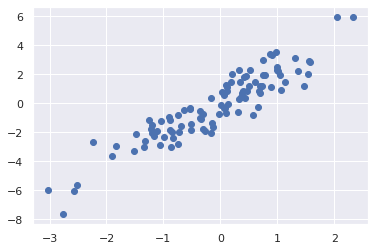

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set() # for plot styling

plt.scatter(X[:, 0], X[:, 1]);

In [13]:
# Let's use fancy indexing to select 20 random points. We'll do this first choosing 20 random
# indicies with no repeasts,  and use these indicies

indicies = np.random.choice(X.shape[0], 20, replace=False)
indicies

array([77, 45,  4, 57, 99, 10, 32,  9, 84, 16, 20, 71, 88,  5, 63, 50,  3,
       18, 30, 53])

In [14]:
selection = X[indicies] # fancy indexing here
selection.shape

(20, 2)

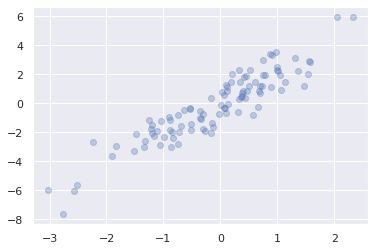

In [15]:
plt.scatter(X[:, 0], X[:, 1], alpha=0.3)
plt.scatter(selection[:, 0], selection[:,1],facecolor='none',s=200);

In [17]:
# This method is used to quickly partition datasets, as is often needed to train/test
# splitting for validation of statistical models

# Modifying Values with fancy indexing
# Fancy indexing can also be used to modify parts of an array.
x = np.arange(10)
i = np.array([2,1,8,4])
x[i] = 99
print(x)

[ 0 99 99  3 99  5  6  7 99  9]


In [18]:
# can use any assignment-type operator for this
x[i] -= 10
print(x)

[ 0 89 89  3 89  5  6  7 89  9]


In [19]:
# the repeated indicies with these operations can cause unexpected results 
x = np.zeros(10)
x[[0,0]] = [4,6]
print(x)

[6. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [20]:
# The result is first x[0] = 4, then x[0] = 6 so it ends with x[0] containing the value 6

i = [2,3,3,4,4,4]
x[i] += 1
x

array([6., 0., 1., 1., 1., 0., 0., 0., 0., 0.])

In [21]:
# x[i] += 1 is meant as a shorthand of x[i] = x[i] + 1
# the augmentation is not happening multiple times, the assignment is
# to repeat the operation use the at() method of ufuncs

x = np.zeros(10)
np.add.at(x, i, 1)
print(x)


[0. 0. 1. 2. 3. 0. 0. 0. 0. 0.]


In [22]:
# the at() method does an in-place application of the given operator at the specified indicies
# (here, i) with the values (here, 1)

# Binning data
# you can use these ideas to effeciently bin data to create a histogram by hand
# Example: imagine we have 1,000 values and would like to quickly find where they fall 

np.random.seed(42)
x = np.random.randn(100)

# compute a histogram by hand
bins = np.linspace(-5, 5, 20)
counts = np.zeros_like(bins)

# find the appropriate bin for each x
i = np.searchsorted(bins, x)

# add 1 to each of these bins
np.add.at(counts, i, 1)

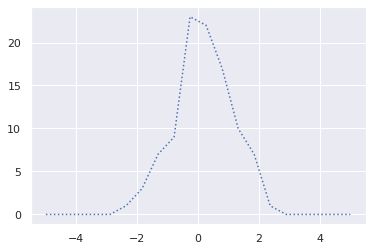

In [24]:
# plot the results
plt.plot(bins, counts, linestyle='dotted');

(array([ 0.,  0.,  0.,  0.,  1.,  3.,  7.,  9., 23., 22., 17., 10.,  7.,
         1.,  0.,  0.,  0.,  0.,  0.]),
 array([-5.        , -4.47368421, -3.94736842, -3.42105263, -2.89473684,
        -2.36842105, -1.84210526, -1.31578947, -0.78947368, -0.26315789,
         0.26315789,  0.78947368,  1.31578947,  1.84210526,  2.36842105,
         2.89473684,  3.42105263,  3.94736842,  4.47368421,  5.        ]),
 [<matplotlib.patches.Polygon at 0x7fc27ba2d550>])

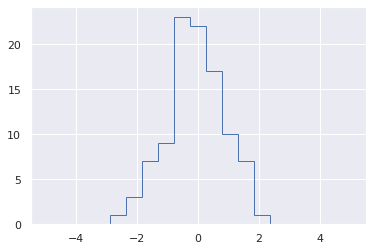

In [27]:
# This is why matplotlib provides the plt.hist() routine, which does the same in a single line
plt.hist(x, bins, histtype='step')

In [28]:
# comparison 
print("Numpy routine: ")
%timeit counts, edges = np.histogram(x, bins)
print("Custom routine: ")
%timeit np.add.at(counts, np.searchsorted(bins, x), 1)

Numpy routine: 
18.4 µs ± 91.8 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
Custom routine: 
12.5 µs ± 111 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [29]:
# This shows that algorithmic effeciency is almost never simple
# an algorithm for large datasets will not always work for small datasets
# the key to efficiently using python in data-intensive applications is knowin about
# convenient routes like np.histogram